In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [139]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [140]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [141]:
#duplicates
duplicates = df.duplicated()
duplicates_data = df[duplicates]
#
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.head())
df.shape[0]


Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1335

In [142]:
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float).round(2)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92
1,18,0,33.770,1,0,southeast,1725.55
2,28,0,33.000,3,0,southeast,4449.46
3,33,0,22.705,0,0,northwest,21984.47
4,32,0,28.880,0,0,northwest,3866.86


In [143]:
df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
df['NordEast'] = df['region'].str.contains('northeast').astype(int)
df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
df['SudEast'] = df['region'].str.contains('southeast').astype(int)
df = df.drop('region', axis=1)

df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
df.head()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92
1,18,0,33.770,1,0,0,0,0,1,1725.55
2,28,0,33.000,3,0,0,0,0,1,4449.46
3,33,0,22.705,0,0,1,0,0,0,21984.47
4,32,0,28.880,0,0,1,0,0,0,3866.86


In [144]:
df.describe()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.253933,0.494382,30.658157,1.097378,0.205243,0.242697,0.241948,0.243446,0.271910,13286.778232
std,14.030779,0.500156,6.101456,1.205727,0.404031,0.428874,0.428423,0.429323,0.445111,12115.615169
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4746.695000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9386.160000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16717.010000
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.430000


<Axes: xlabel='smoker'>

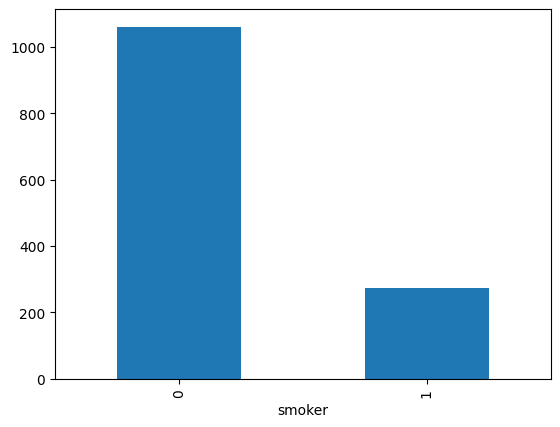

In [145]:
df['smoker'].value_counts().plot.bar()

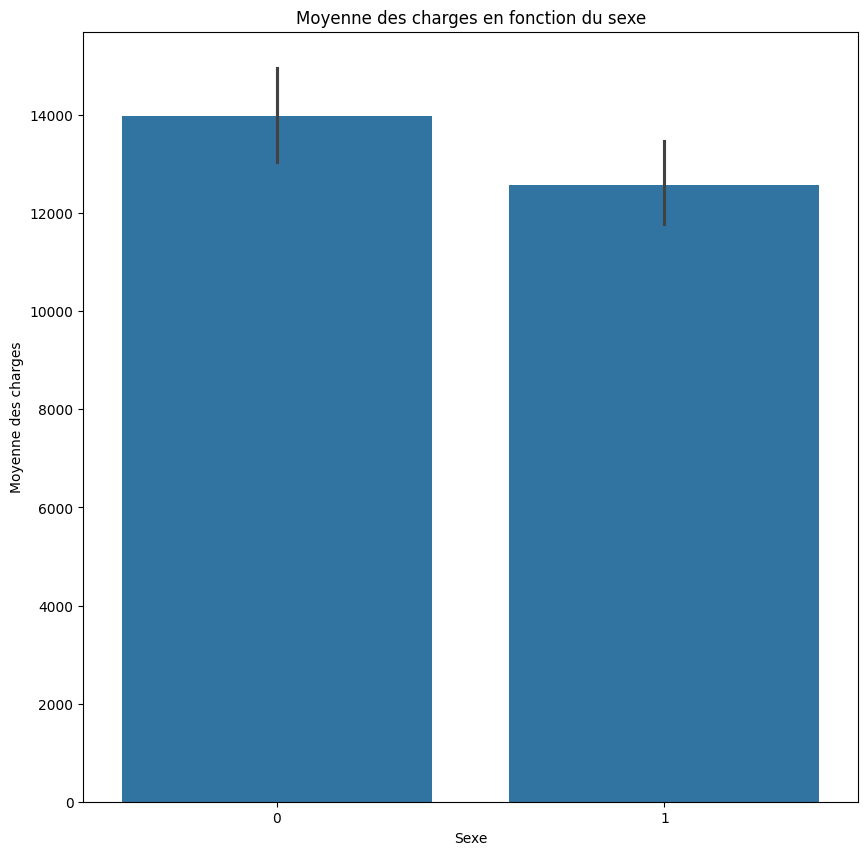

In [153]:
plt.figure(figsize=(10, 10))
sns.barplot(x='sex', y='charges', data=df, estimator='mean')


plt.title('Moyenne des charges en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Moyenne des charges')

plt.show()

<Axes: xlabel='children'>

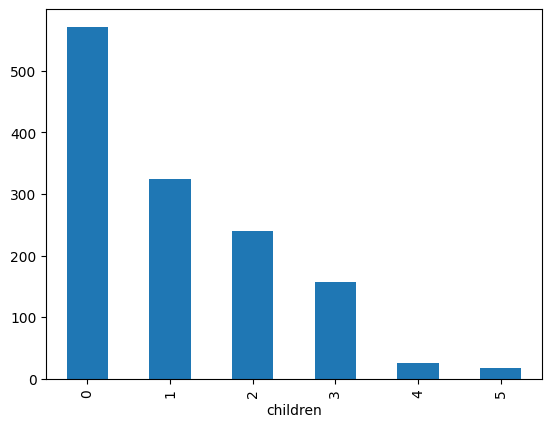

In [154]:
df['children'].value_counts().plot.bar()

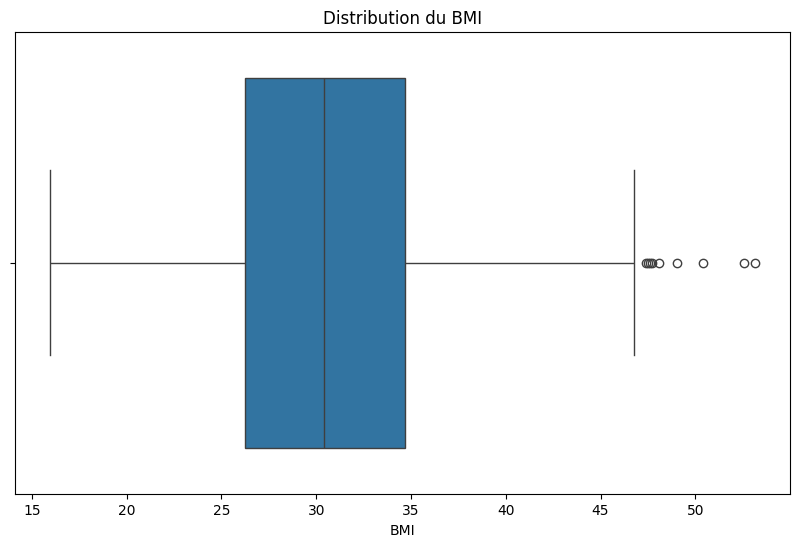

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)

# Ajout de titres et d'étiquettes
plt.title('Distribution du BMI')
plt.xlabel('BMI')

# Affichage du graphique
plt.show()

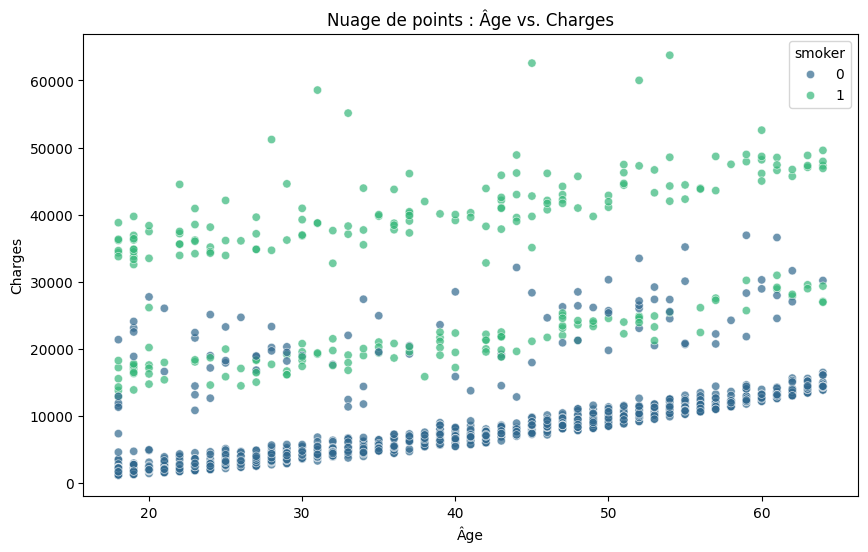

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)

# Ajout de titres et d'étiquettes
plt.title('Nuage de points : Âge vs. Charges')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Affichage du graphique
plt.show()

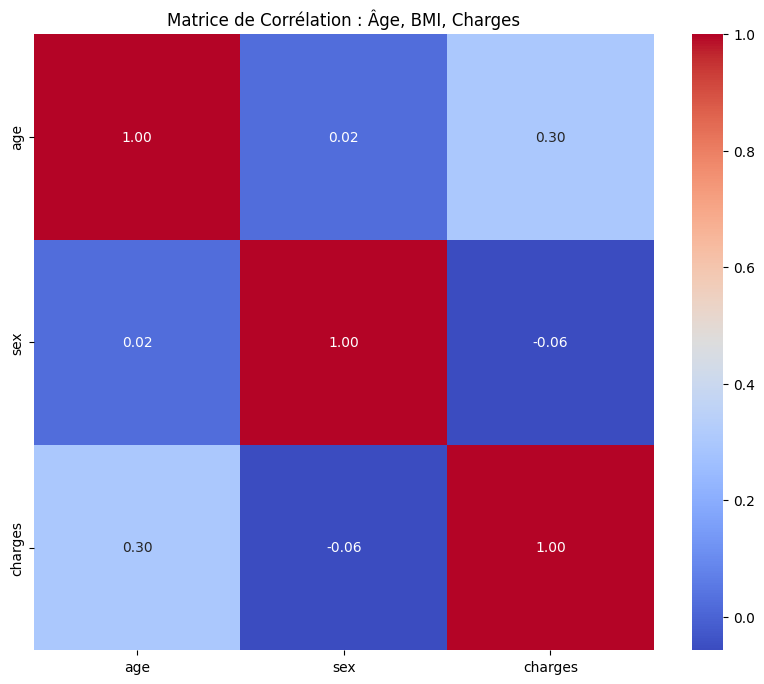

In [171]:
# Sélection des colonnes pertinentes
cols = ['age', 'sex', 'charges']

# Création de la matrice de corrélation
correlation_matrix = df[cols].corr()

# Création d'une heatmap pour visualiser la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajout de titres
plt.title('Matrice de Corrélation : Âge, BMI, Charges')

# Affichage de la heatmap
plt.show()

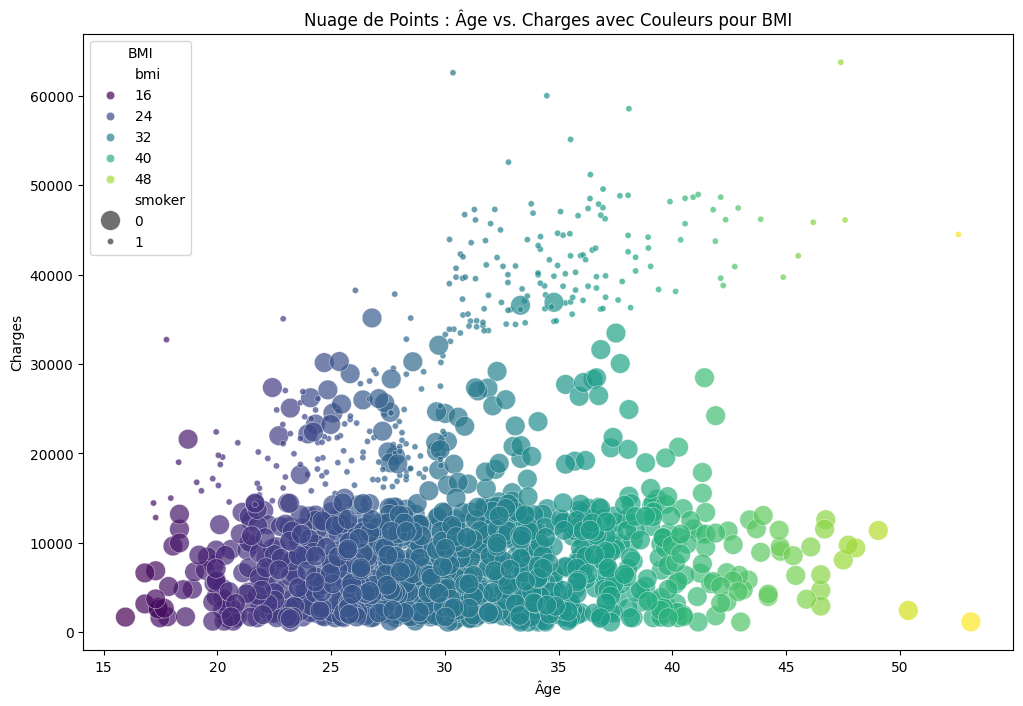

In [190]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=df, size='smoker', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : Âge vs. Charges avec Couleurs pour BMI')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()